In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

## **Simple linear regression**
We want to estimate the relationship between two quantitative variables by fitting a line to the observed data:


1.   **Dataset**
  >$ (x_i,y_i) \ \ \  i \in \{1, \cdots, m\} $
2.  **Model**
> $y = \beta_0+\beta_1 x$
3.  **Cost function**
> $\frac{1}{m}\sum\limits_{i=0}^{m}(\hat{y}^{(i)}-y^{(i)})^{2}=\frac{1}{m}\sum\limits_{i=0}^{m}(\beta_0+\beta_1 x^{(i)}-y^{(i)})^{2}$
4.   **Gradients**
>$\frac{\delta loss}{\delta\beta_1}= \frac{2}{m}\sum\limits_{i=0}^{m}x^{(i)}({\hat{y}}^{(i)}-y^{(i)})=\frac{2}{m}\sum\limits_{i=0}^{m}x^{(i)}(\beta_0 + \beta_1x^{(i)}-y^{(i)})$
>$\frac{\delta loss}{\delta\beta_0}= \frac{2}{m}\sum\limits_{i=0}^{m}({\hat{y}}^{(i)}-y^{(i)})=\frac{2}{m}\sum\limits_{i=0}^{m}(\beta_0+\beta_1 x^{(i)}+b-y^{(i)})$

5.   **Gradient descent**
> See the algorithm
6.   **Implementation (Matrix representation)**
>$
  \begin{pmatrix}
         1 & x_{1}\\
         1 & x_{2}\\
         1 & \vdots\\
         1 & x_{m}
     \end{pmatrix}\times
     \begin{pmatrix}
         \beta_0\\
         \beta_1
     \end{pmatrix}=\begin{pmatrix}
         y_{1}\\
         y_{2}\\
         \vdots\\
         y_{m}
     \end{pmatrix}
  $

## **Machine learning version (from scratch)**

### **Implementation**

In [ ]:
def model(X, beta):
  return X.dot(beta)

def cost_function(X, y, beta):
  m = len(y)
  return (1/m) * np.sum((model(X, beta) - y)**2)

def grad(X, y, beta):
    m = len(y)
    return (2/m) * X.T.dot(model(X, beta) - y)

def gradient_descent(X, y, beta, learning_rate, n_iterations):
  cost_history = np.zeros(n_iterations)

  for i in range(0, n_iterations):
    beta = beta - learning_rate * grad(X, y, beta)
    cost_history[i] = cost_function(X, y, beta)

  return beta, cost_history

### **Example**

In [ ]:
n_samples = 100

x = np.linspace(0, 10, n_samples).reshape((n_samples, 1))

y = x + np.random.randn(n_samples, 1)

X = np.hstack((np.ones(x.shape),x))

### **Data visualization**

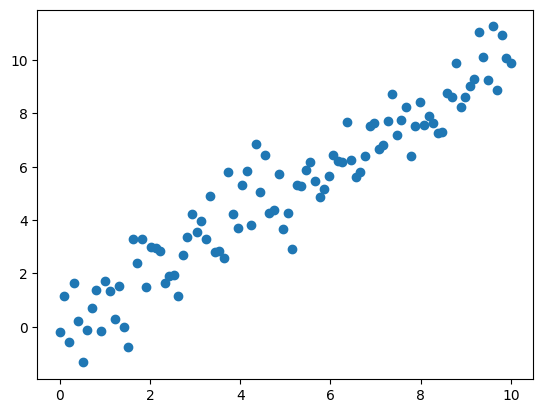

In [ ]:
plt.scatter(x, y)
plt.show()

### **Regression**

In [ ]:
n_iterations = 1000
learning_rate = 0.01

beta = np.random.randn(2, 1)

beta_final, cost_history = gradient_descent(X, y, beta, learning_rate, n_iterations)

### **Prediction & visualization**

[[0.03108162]
 [1.00496607]]


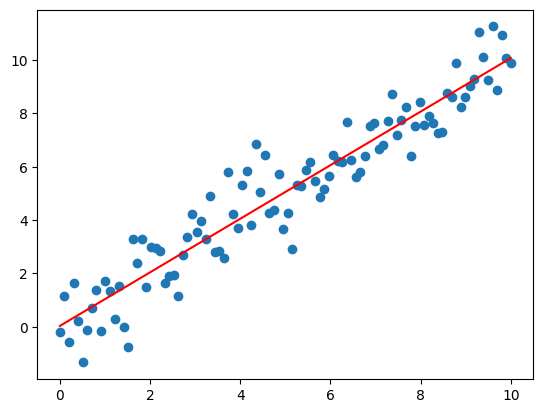

In [ ]:
predictions_scratch = model(X, beta_final)
print(beta_final)

plt.scatter(x, y)
plt.plot(x, predictions_scratch, c='r')
plt.show()

## **Analytics version**

### **Implementation**

In [ ]:
def analytics(x, y):

  beta_analytics = np.zeros((2,1))


  mean_x = np.mean(x)
  mean_y = np.mean(y)

  beta_analytics[1] = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)
  beta_analytics[0] = mean_y - beta_analytics[1] * mean_x

  return beta_analytics

### **Regression**

In [ ]:
beta_analytics = analytics(x, y)

beta_analytics

array([[0.03898415],
       [1.00377784]])

### **Prediction & visualization**

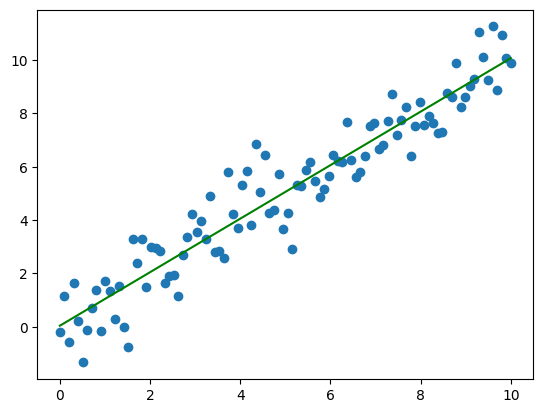

In [ ]:
XX = np.hstack((np.ones(x.shape),x))
predictions_analytics = model(XX, beta_analytics)

plt.scatter(x, y)
plt.plot(x, predictions_analytics, c='g')
plt.show()

## **Machine learning version (advanced version)**
### **Implementation**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model
model.fit(x, y)

beta_sklearn = np.zeros((2,1))

beta_sklearn[0] = model.intercept_
beta_sklearn[1] = model.coef_

beta_sklearn
# Make predictions on new data points



array([[0.03898415],
       [1.00377784]])

### **Prediction & visualization**

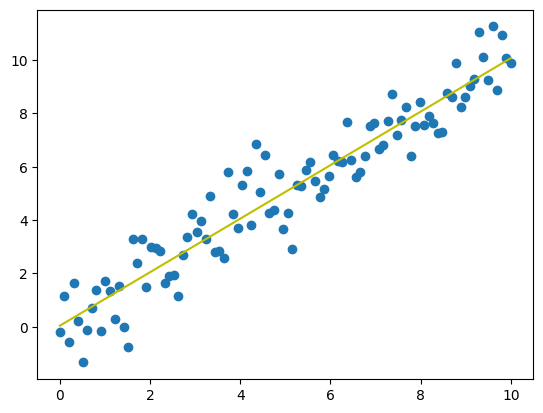

In [ ]:
predictions_sklearn = model.predict(x)

plt.scatter(x, y)
plt.plot(x, predictions_sklearn, c='y')
plt.show()